In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=pd.read_csv('train_X.csv')
y=pd.read_csv('train_Y.csv')
x=x.drop("Id",axis=1)
X=np.asarray(x)
Y=np.asarray(y)
X= np.concatenate((X, Y), axis=1)
na_rows = np.any(np.isnan(X), axis=1)


X = X[~na_rows]

Y = X[:, -1]
# Y=Y.reshape(331,1)
X = X[:, :-2]



# # Y=Y[:, 1]
# # Y=Y.reshape(418,1)
n=X.shape[0]
k=X.shape[1]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

W=np.zeros((k,1))
B=0
Y=Y.reshape(n,1)


In [422]:
def loss(A,W,B,Y):
    N=np.dot(A,W)
    P=N+B
    S=sigmoid(P)
    S= np.clip(S, 1e-15, 1 - 1e-15)
    a=np.dot(Y.T,np.log(S))
    b=np.dot((1-Y).T,np.log(1-S))
    n=A.shape[0]
    return (np.sum(a+b))*(-1/n)
def dLdW(A,W,B,Y):
    N=np.dot(A,W)
    P=N+B
    S=sigmoid(P)
    n=A.shape[0]
    return np.dot((S-Y).T,A).T/n
def dLdB(A,W,B,Y):
    N=np.dot(A,W)
    P=N+B
    S=sigmoid(P)
    n=A.shape[0]
    return np.sum(S-Y)/n
learningrate=0.0015
print(loss(X,W,B,Y))
cost=[]
for i in range(100000):
    W=W-learningrate*dLdW(X,W,B,Y)
    B=B-learningrate*dLdB(X,W,B,Y)
    cost.append(loss(X,W,B,Y))
    if (i%10000==0):
        print(loss(X,W,B,Y))

print(loss(X,W,B,Y))

0.6931471805599457
0.6670436138823521
0.4965207161822649
0.46674526614528006
0.4568754637564383
0.4528878896359784
0.45093073005375295
0.4497691305120841
0.448962451287369
0.4483397462302751
0.4478290350881617
0.44739685497755394


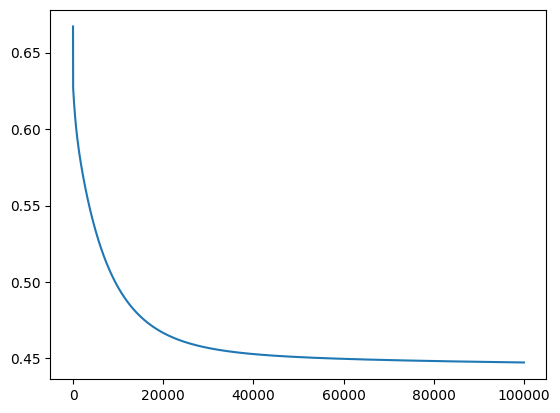

In [423]:
plt.plot(np.arange(100000), cost)
plt.show()
